In [1]:
from scalar import Scalar
from simple_nn import ScalarNeuron, ScalarLayer, ScalarMLP

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

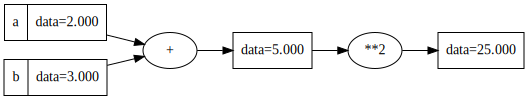

In [7]:
a = Scalar(2, _label='a')
b = Scalar(3, _label='b')
c = a + b
d = c**2
d.draw()

In [2]:
shape = (4, 3)
data = np.random.uniform(-1, 3, size=shape)
y = np.random.choice([-1, 1], size=shape[0])
data, y

(array([[ 2.43987665,  1.10510912,  1.1143344 ],
        [ 2.18858285,  1.58046222, -0.06629643],
        [ 2.34499586,  2.62153331,  0.98365424],
        [ 1.16899138,  0.63269743,  2.89574943]]),
 array([ 1, -1,  1, -1]))

In [3]:
model = ScalarMLP(shape[1], [4, 4, 1])
epochs = 100
loss_arr = np.zeros(epochs)

for e in tqdm(range(epochs)):
    # forward
    ypred = [model(x) for x in data]
    loss: Scalar = sum((yout[0] - ygt)**2 for ygt, yout in zip(y, ypred))
    # backward
    model.zero_grad()
    loss.backward()
    # update
    for p in model.parameters():
        p.data += -.01 * p.grad
    loss_arr[e] = loss.data

f'Loss: {loss.data}'

100%|██████████| 100/100 [00:00<00:00, 240.52it/s]


'Loss: 0.14235159357219698'

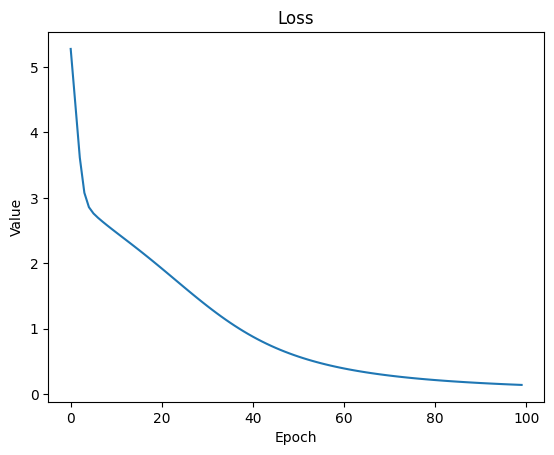

In [4]:
plt.plot(loss_arr)
plt.title('Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Value')
plt.show()

In [5]:
list(zip(ypred, y))

[([Scalar(0.7954593193750483, grad=-0.409)], 1),
 ([Scalar(-0.7542770013156617, grad=0.491)], -1),
 ([Scalar(0.8576542937840698, grad=-0.285)], 1),
 ([Scalar(-0.859029750013901, grad=0.282)], -1)]

In [2]:
# inputs x1,x2
x1 = Scalar(2.0, label='x1')
x2 = Scalar(0.0, label='x2')
# weights w1,w2
w1 = Scalar(-3.0, label='w1')
w2 = Scalar(1.0, label='w2')
# bias of the neuron
b = Scalar(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

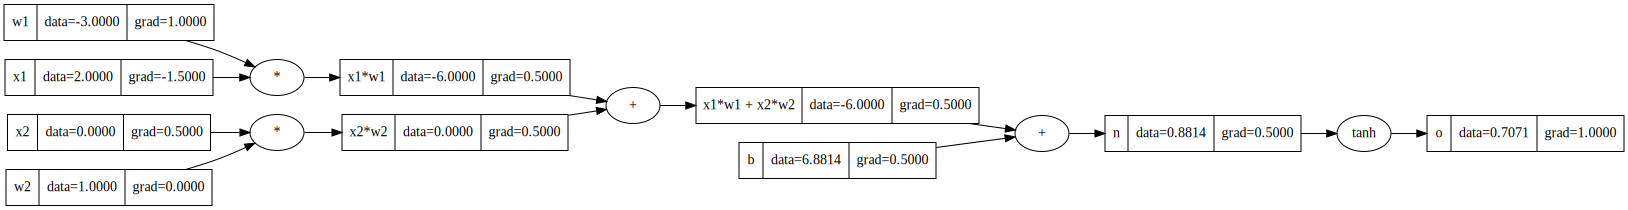

In [3]:
o.backward()
o.draw()

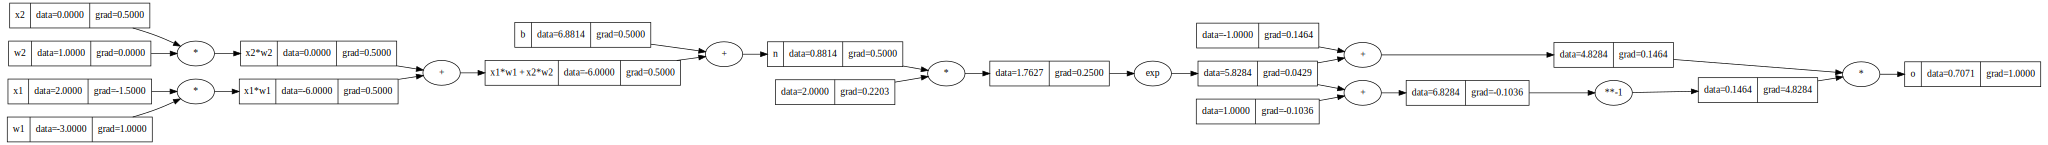

In [2]:
# inputs x1,x2
x1 = Scalar(2.0, label='x1')
x2 = Scalar(0.0, label='x2')
# weights w1,w2
w1 = Scalar(-3.0, label='w1')
w2 = Scalar(1.0, label='w2')
# bias of the neuron
b = Scalar(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e-1)/(e+1)
o.label = 'o'

o.backward()

o.draw()

In [3]:
import nn
from scalar import Scalar

xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]

model = nn.MLP(3, [4, 4, 1])

In [4]:
for e in range(100):
    # forward
    ypred = [model(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    # backward
    for p in model.parameters():
        p.grad = .0
    loss.backward()
    # update
    for p in model.parameters():
        p.data += -.005 * p.grad

    print(loss)

Scalar(5.462254973208051, grad=1.0)
Scalar(5.263605617659659, grad=1.0)
Scalar(5.084310179742546, grad=1.0)
Scalar(4.922935540192715, grad=1.0)
Scalar(4.7780949227650655, grad=1.0)
Scalar(4.6482422464970465, grad=1.0)
Scalar(4.531642316630944, grad=1.0)
Scalar(4.426449185852919, grad=1.0)
Scalar(4.3308213489483816, grad=1.0)
Scalar(4.243024131340941, grad=1.0)
Scalar(4.161496914274146, grad=1.0)
Scalar(4.08488328968835, grad=1.0)
Scalar(4.012032593445923, grad=1.0)
Scalar(3.941983808381539, grad=1.0)
Scalar(3.8739412321626325, grad=1.0)
Scalar(3.807248393253466, grad=1.0)
Scalar(3.7413639767847715, grad=1.0)
Scalar(3.675841519768353, grad=1.0)
Scalar(3.610313367964797, grad=1.0)
Scalar(3.5444786821691388, grad=1.0)
Scalar(3.4780949441715796, grad=1.0)
Scalar(3.4109722862604723, grad=1.0)
Scalar(3.342969948102082, grad=1.0)
Scalar(3.2739941898453564, grad=1.0)
Scalar(3.203997030619022, grad=1.0)
Scalar(3.1329752284226826, grad=1.0)
Scalar(3.0609689745559523, grad=1.0)
Scalar(2.988059852

In [86]:
# forward
ypred = [model(x) for x in xs]
loss = sum((y - yp[0])**2 for y, yp in zip(ys, ypred))
loss

Scalar(4.776572349556213, grad=0.0)

In [82]:
# backward
loss.backward()

In [83]:
for p in model.parameters():
    p.data += -lr * p.grad

In [5]:
ypred

[Scalar(0.7227884895480556, grad=-0.5544230209038887),
 Scalar(-0.8341000893105548, grad=0.3317998213788904),
 Scalar(-0.5969411871737751, grad=0.8061176256524498),
 Scalar(0.728236643625854, grad=-0.5435267127482919)]

In [6]:
from utils import top_sort, top_sort_2, toposort, tree, graph
from scalar import Scalar

x1 = Scalar(2.0, label='x1')
x2 = Scalar(0.0, label='x2')
# weights w1,w2
w1 = Scalar(-3.0, label='w1')
w2 = Scalar(1.0, label='w2')
# bias of the neuron
b = Scalar(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e-1)/(e+1)
o.label = 'o'

n1, e1 = tree(n)
n2, e2 = graph(n)

e2 == e1

True

In [7]:
import numpy as np
from numbers import Number
from nn import ScalarLayer


nin = 3
nouts = [4, 4, 1]

_all = [nin] + nouts

# layers = list(zip(_all, _all[1:]))

layers = [ScalarLayer(*pair) for pair in zip([nin] + nouts, nouts)]

layers